In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno
from collections import Counter
%matplotlib inline

In [2]:
df = pd.read_csv('../data/interim/train_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89214 entries, 0 to 89213
Data columns (total 66 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ProductName                                        89213 non-null  object 
 1   EngineVersion                                      89214 non-null  object 
 2   AppVersion                                         89214 non-null  object 
 3   AvSigVersion                                       89214 non-null  object 
 4   RtpStateBitfield                                   88878 non-null  float64
 5   IsSxsPassiveMode                                   89214 non-null  int64  
 6   AVProductStatesIdentifier                          88849 non-null  float64
 7   AVProductsInstalled                                88849 non-null  float64
 8   AVProductsEnabled                                  88849 non-null  float64
 9   HasTpm

<AxesSubplot:>

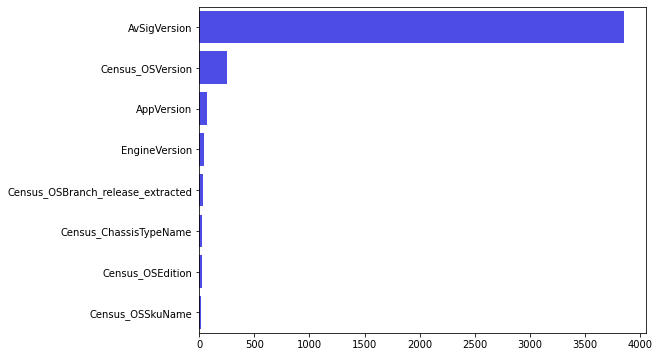

In [4]:
cat_col = df.select_dtypes('object').columns.tolist()
cardinality = df[cat_col].nunique().sort_values(ascending=False)
plt.figure(figsize=(8,6))
high_cardinality = cardinality[cardinality > 15]
sns.barplot(y=high_cardinality.index, 
            x=high_cardinality.values, 
            orient='h', 
            color='b', 
            alpha=.8)

In [5]:
for col in cat_col:
    print(f'Feature: {col} \nUnique Values Count: {df[col].nunique()}\nMissing Values Count: {df[col].isnull().sum()}\nValue counts:\n{df[col].value_counts()}\n\n')   

Feature: ProductName 
Unique Values Count: 2
Missing Values Count: 1
Value counts:
win8defender    88213
mse              1000
Name: ProductName, dtype: int64


Feature: EngineVersion 
Unique Values Count: 40
Missing Values Count: 0
Value counts:
1.1.15200.1    38090
1.1.15100.1    36948
1.1.15000.2     2605
1.1.14901.4     2230
1.1.14600.4     1564
1.1.14800.3     1374
1.1.15300.6     1239
1.1.14104.0      958
1.1.13504.0      755
1.1.15300.5      663
1.1.14700.5      487
1.1.14500.5      475
1.1.14405.2      377
1.1.14306.0      256
1.1.14202.0      173
1.1.14003.0      124
1.1.13407.0      100
1.1.13804.0       95
1.1.13303.0       95
1.1.13903.0       93
1.1.13601.0       64
1.1.12902.0       62
1.1.14305.0       56
1.1.13202.0       51
1.1.13000.0       49
1.1.13704.0       45
1.1.13103.0       41
1.1.13701.0       38
1.1.12805.0       29
1.1.15000.1       22
1.1.14700.3       15
1.1.14901.3       10
1.1.14700.4       10
1.1.14800.1        8
1.1.14201.0        3
1.1.14500.2       

In [6]:
df['EngineVersion_encoded'] = [int(item[2]) for item in df.EngineVersion.str.split('.')]
df[['EngineVersion','EngineVersion_encoded']]

,EngineVersion,EngineVersion_encoded
0,1.1.15200.1,15200
1,1.1.15100.1,15100
2,1.1.15200.1,15200
3,1.1.15100.1,15100
4,1.1.15100.1,15100
...,...,...
89209,1.1.15200.1,15200
89210,1.1.15200.1,15200
89211,1.1.14901.4,14901
89212,1.1.15200.1,15200


In [7]:
df.groupby('EngineVersion_encoded').count().reset_index().reset_index()[['index', 'EngineVersion_encoded']]

,index,EngineVersion_encoded
0,0,11701
1,1,12805
2,2,12902
3,3,13000
4,4,13103
5,5,13202
6,6,13303
7,7,13407
8,8,13504
9,9,13601


In [8]:
EngineVersion_encoded_mapper_key = df.groupby('EngineVersion_encoded').count().reset_index().reset_index()['EngineVersion_encoded'].tolist()
EngineVersion_encoded_mapper_val = df.groupby('EngineVersion_encoded').count().reset_index().reset_index()['index'].tolist()
EngineVersion_encoded_mapper = dict(zip(EngineVersion_encoded_mapper_key, EngineVersion_encoded_mapper_val))
EngineVersion_encoded_mapper

{11701: 0,
 12805: 1,
 12902: 2,
 13000: 3,
 13103: 4,
 13202: 5,
 13303: 6,
 13407: 7,
 13504: 8,
 13601: 9,
 13701: 10,
 13704: 11,
 13804: 12,
 13903: 13,
 14003: 14,
 14102: 15,
 14103: 16,
 14104: 17,
 14201: 18,
 14202: 19,
 14303: 20,
 14305: 21,
 14306: 22,
 14405: 23,
 14500: 24,
 14600: 25,
 14700: 26,
 14800: 27,
 14901: 28,
 15000: 29,
 15100: 30,
 15200: 31,
 15300: 32}

In [9]:
df['EngineVersion_encoded'] = df['EngineVersion_encoded'].map(EngineVersion_encoded_mapper)
df[['EngineVersion', 'EngineVersion_encoded']]

,EngineVersion,EngineVersion_encoded
0,1.1.15200.1,31
1,1.1.15100.1,30
2,1.1.15200.1,31
3,1.1.15100.1,30
4,1.1.15100.1,30
...,...,...
89209,1.1.15200.1,31
89210,1.1.15200.1,31
89211,1.1.14901.4,28
89212,1.1.15200.1,31


In [10]:
to_drop = []
to_drop.append('EngineVersion')

In [11]:
df.AppVersion.value_counts()

4.18.1807.18075    51203
4.18.1806.18062     8441
4.12.16299.15       3553
4.10.209.0          2874
4.13.17134.1        2642
                   ...  
4.5.216.0              1
4.17.17672.1000        1
4.10.14393.2248        1
4.17.17677.1000        1
4.17.17682.1000        1
Name: AppVersion, Length: 73, dtype: int64

In [12]:
df['AppVersion_encoded'] = [int(item[1]) for item in df.AppVersion.str.split('.')]
df[['AppVersion','AppVersion_encoded']]

,AppVersion,AppVersion_encoded
0,4.18.1807.18075,18
1,4.18.1806.18062,18
2,4.18.1807.18075,18
3,4.9.10586.0,9
4,4.18.1807.18075,18
...,...,...
89209,4.18.1807.18075,18
89210,4.18.1807.18075,18
89211,4.16.17656.18052,16
89212,4.18.1807.18075,18


In [13]:
len(df.loc[df['AppVersion'].str[0] != '4', 'AppVersion'])

0

In [14]:
AppVersion_encoded_mapper_key = df.groupby('AppVersion_encoded').count().reset_index().reset_index()['AppVersion_encoded'].tolist()
AppVersion_encoded_mapper_val = df.groupby('AppVersion_encoded').count().reset_index().reset_index()['index'].tolist()
AppVersion_encoded_mapper = dict(zip(AppVersion_encoded_mapper_key, AppVersion_encoded_mapper_val))
AppVersion_encoded_mapper

{4: 0,
 5: 1,
 6: 2,
 7: 3,
 8: 4,
 9: 5,
 10: 6,
 11: 7,
 12: 8,
 13: 9,
 14: 10,
 15: 11,
 16: 12,
 17: 13,
 18: 14}

In [15]:
df['AppVersion_encoded'] = df['AppVersion_encoded'].map(AppVersion_encoded_mapper)
df[['AppVersion', 'AppVersion_encoded']]

,AppVersion,AppVersion_encoded
0,4.18.1807.18075,14
1,4.18.1806.18062,14
2,4.18.1807.18075,14
3,4.9.10586.0,5
4,4.18.1807.18075,14
...,...,...
89209,4.18.1807.18075,14
89210,4.18.1807.18075,14
89211,4.16.17656.18052,12
89212,4.18.1807.18075,14


In [16]:
to_drop.append('AppVersion')

In [17]:
df.AvSigVersion.nunique()

3857

In [18]:
df['AvSigVersion_encoded'] = [int(item[1]) for item in df.AvSigVersion.str.split('.')]
df[['AvSigVersion','AvSigVersion_encoded']]

,AvSigVersion,AvSigVersion_encoded
0,1.275.1140.0,275
1,1.273.371.0,273
2,1.275.1105.0,275
3,1.273.1405.0,273
4,1.273.1208.0,273
...,...,...
89209,1.275.388.0,275
89210,1.275.1733.0,275
89211,1.269.521.0,269
89212,1.275.1417.0,275


In [19]:
AvSigVersion_encoded_mapper_key = df.groupby('AvSigVersion_encoded').count().reset_index().reset_index()['AvSigVersion_encoded'].tolist()
AvSigVersion_encoded_mapper_val = df.groupby('AvSigVersion_encoded').count().reset_index().reset_index()['index'].tolist()
AvSigVersion_encoded_mapper = dict(zip(AvSigVersion_encoded_mapper_key, AvSigVersion_encoded_mapper_val))
AvSigVersion_encoded_mapper

{0: 0,
 199: 1,
 207: 2,
 221: 3,
 223: 4,
 225: 5,
 227: 6,
 229: 7,
 231: 8,
 233: 9,
 235: 10,
 237: 11,
 239: 12,
 241: 13,
 243: 14,
 245: 15,
 247: 16,
 249: 17,
 251: 18,
 253: 19,
 255: 20,
 257: 21,
 259: 22,
 261: 23,
 263: 24,
 265: 25,
 267: 26,
 269: 27,
 271: 28,
 273: 29,
 275: 30,
 277: 31}

In [20]:
df.loc[df.AvSigVersion.str.startswith('0'), 'AvSigVersion']

35945    0.0.0.0
Name: AvSigVersion, dtype: object

In [21]:
idx = df[df.AvSigVersion == '0.0.0.0'].index
df.drop(idx, inplace=True)

In [22]:
df['AvSigVersion_encoded'] = df['AvSigVersion_encoded'].map(AvSigVersion_encoded_mapper)
df[['AvSigVersion', 'AvSigVersion_encoded']]

,AvSigVersion,AvSigVersion_encoded
0,1.275.1140.0,30
1,1.273.371.0,29
2,1.275.1105.0,30
3,1.273.1405.0,29
4,1.273.1208.0,29
...,...,...
89209,1.275.388.0,30
89210,1.275.1733.0,30
89211,1.269.521.0,27
89212,1.275.1417.0,30


In [23]:
df['AvSigVersion_encoded'].value_counts()

30    38628
29    37432
28     2657
27     2253
24     1561
26     1385
18      959
31      819
11      753
23      508
25      494
22      379
21      259
19      174
17      130
10      102
15       97
9        95
16       92
12       64
5        64
20       56
8        50
14       44
6        42
7        41
13       38
4        27
3         7
1         2
2         1
Name: AvSigVersion_encoded, dtype: int64

In [24]:
to_drop.append('AvSigVersion')

In [25]:
df.OsVer.value_counts()

10.0.0.0    86181
6.3.0.0      2040
6.1.1.0       992
Name: OsVer, dtype: int64

In [26]:
df.OsVer = df.OsVer.map({'10.0.0.0':3, '6.3.0.0':2, '6.1.1.0':1})
df.OsVer.value_counts()

3    86181
2     2040
1      992
Name: OsVer, dtype: int64

In [27]:
df = df.rename(columns={'OsVer':'OsVer_encoded'})

In [28]:
df.Census_OSVersion.value_counts()

10.0.17134.228      14058
10.0.17134.165       8879
10.0.16299.431       5484
10.0.17134.285       4710
10.0.16299.547       3462
                    ...  
10.0.10240.16387        1
10.0.14393.594          1
10.0.10586.499          1
10.0.10240.16389        1
10.0.10565.41736        1
Name: Census_OSVersion, Length: 252, dtype: int64

In [29]:
Counter([int(item[0]) for item in df.Census_OSVersion.str.split('.')])

Counter({10: 89212, 6: 1})

In [30]:
Counter([int(item[1]) for item in df.Census_OSVersion.str.split('.')])

Counter({0: 89212, 3: 1})

In [31]:
idx = df[df.Census_OSVersion == '6.3.9600.18756'].index
df.drop(idx, inplace=True)

In [32]:
Counter([int(item[2]) for item in df.Census_OSVersion.str.split('.')])

Counter({17134: 39863,
         10586: 6124,
         16299: 24425,
         15063: 7948,
         14393: 7883,
         10240: 2727,
         17755: 9,
         17733: 6,
         17692: 35,
         17758: 20,
         17682: 5,
         17133: 8,
         17744: 36,
         14372: 1,
         17723: 1,
         17741: 14,
         17751: 8,
         17738: 29,
         17677: 3,
         17661: 1,
         18234: 2,
         17763: 13,
         17686: 6,
         17746: 9,
         17713: 2,
         18237: 4,
         17754: 11,
         17760: 5,
         17735: 5,
         17666: 1,
         14385: 1,
         16257: 1,
         14366: 1,
         18242: 3,
         17747: 1,
         10565: 1})

In [33]:
df['Census_OSVersion_encoded'] = [int(item[2]) for item in df.Census_OSVersion.str.split('.')]
df['Census_OSVersion_encoded'].value_counts()

17134    39863
16299    24425
15063     7948
14393     7883
10586     6124
10240     2727
17744       36
17692       35
17738       29
17758       20
17741       14
17763       13
17754       11
17746        9
17755        9
17751        8
17133        8
17733        6
17686        6
17682        5
17735        5
17760        5
18237        4
18242        3
17677        3
17713        2
18234        2
17723        1
14385        1
17661        1
17666        1
16257        1
14372        1
17747        1
14366        1
10565        1
Name: Census_OSVersion_encoded, dtype: int64

In [34]:
Census_OSVersion_encoded_mapper_key = df.groupby('Census_OSVersion_encoded').count().reset_index().reset_index()['Census_OSVersion_encoded'].tolist()
Census_OSVersion_encoded_mapper_val = df.groupby('Census_OSVersion_encoded').count().reset_index().reset_index()['index'].tolist()
Census_OSVersion_encoded_mapper = dict(zip(Census_OSVersion_encoded_mapper_key, Census_OSVersion_encoded_mapper_val))
Census_OSVersion_encoded_mapper

{10240: 0,
 10565: 1,
 10586: 2,
 14366: 3,
 14372: 4,
 14385: 5,
 14393: 6,
 15063: 7,
 16257: 8,
 16299: 9,
 17133: 10,
 17134: 11,
 17661: 12,
 17666: 13,
 17677: 14,
 17682: 15,
 17686: 16,
 17692: 17,
 17713: 18,
 17723: 19,
 17733: 20,
 17735: 21,
 17738: 22,
 17741: 23,
 17744: 24,
 17746: 25,
 17747: 26,
 17751: 27,
 17754: 28,
 17755: 29,
 17758: 30,
 17760: 31,
 17763: 32,
 18234: 33,
 18237: 34,
 18242: 35}

In [35]:
df['Census_OSVersion_encoded'] = df['Census_OSVersion_encoded'].map(Census_OSVersion_encoded_mapper)
df[['Census_OSVersion', 'Census_OSVersion_encoded']]

,Census_OSVersion,Census_OSVersion_encoded
0,10.0.17134.285,11
1,10.0.17134.165,11
2,10.0.17134.228,11
3,10.0.10586.0,2
4,10.0.17134.48,11
...,...,...
89209,10.0.16299.248,9
89210,10.0.16299.431,9
89211,10.0.17134.81,11
89212,10.0.17134.285,11


In [36]:
to_drop.append('Census_OSVersion')

In [37]:
df.drop(to_drop, axis=1, inplace=True)
df.shape

(89212, 66)

In [38]:
cat_col = df.select_dtypes('object').columns.tolist()
high_card_col = [col for col in cat_col if df[col].nunique()>15]
high_card_col 

['Census_ChassisTypeName',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSBranch_release_extracted']

In [39]:
for col in high_card_col:
    print(f'Feature: {col} \nUnique Values Count: {df[col].nunique()}\nMissing Values Count: {df[col].isnull().sum()}\nValue counts:\n{df[col].value_counts()}\n\n')

Feature: Census_ChassisTypeName 
Unique Values Count: 27
Missing Values Count: 3
Value counts:
Notebook               52541
Desktop                18770
Laptop                  6906
Portable                3498
AllinOne                2049
MiniTower                850
Convertible              844
Unknown                  798
Other                    756
Detachable               507
LowProfileDesktop        453
HandHeld                 444
SpaceSaving              309
Tablet                   136
Tower                    116
MainServerChassis         97
MiniPC                    48
LunchBox                  39
RackMountChassis          27
SubNotebook                6
BusExpansionChassis        6
30                         4
81                         1
127                        1
0                          1
IoTGateway                 1
SubChassis                 1
Name: Census_ChassisTypeName, dtype: int64


Feature: Census_OSEdition 
Unique Values Count: 21
Missing Values Count: 0
Va

In [40]:
types = df.Census_ChassisTypeName.value_counts()[df.Census_ChassisTypeName.value_counts() < 100].index.tolist()
types

['MainServerChassis',
 'MiniPC',
 'LunchBox',
 'RackMountChassis',
 'SubNotebook',
 'BusExpansionChassis',
 '30',
 '81',
 '127',
 '0',
 'IoTGateway',
 'SubChassis']

In [41]:
for type_ in types:
    df.loc[df.Census_ChassisTypeName == type_, 'Census_ChassisTypeName'] = 'Other'

In [42]:
df.Census_ChassisTypeName.value_counts()

Notebook             52541
Desktop              18770
Laptop                6906
Portable              3498
AllinOne              2049
Other                  988
MiniTower              850
Convertible            844
Unknown                798
Detachable             507
LowProfileDesktop      453
HandHeld               444
SpaceSaving            309
Tablet                 136
Tower                  116
Name: Census_ChassisTypeName, dtype: int64

In [43]:
editions = df.Census_OSEdition.value_counts()[df.Census_OSEdition.value_counts() < 50].index.tolist()
editions

['CoreN',
 'ServerStandardEval',
 'ServerDatacenterEval',
 'EducationN',
 'EnterpriseSN',
 'ServerSolution',
 'EnterpriseN',
 'ProfessionalEducationN',
 'ProfessionalWorkstation',
 'ServerDatacenter']

In [44]:
for edition in editions:
    df.loc[df.Census_OSEdition == edition, 'Census_OSEdition'] = 'Other'

In [45]:
df.Census_OSEdition.value_counts()

Core                     34779
Professional             31158
CoreSingleLanguage       19483
CoreCountrySpecific       1677
ProfessionalEducation      565
Education                  438
Enterprise                 367
ProfessionalN              292
EnterpriseS                206
Other                      100
ServerStandard              89
Cloud                       58
Name: Census_OSEdition, dtype: int64

In [46]:
names = df.Census_OSSkuName.value_counts()[df.Census_OSSkuName.value_counts() < 50].index.tolist()
names

['CORE_N',
 'STANDARD_EVALUATION_SERVER',
 'DATACENTER_EVALUATION_SERVER',
 'EDUCATION_N',
 'ENTERPRISE_S_N',
 'SB_SOLUTION_SERVER',
 'ENTERPRISE_N',
 'DATACENTER_SERVER',
 'PRO_WORKSTATION',
 'UNLICENSED']

In [47]:
for name in names:
    df.loc[df.Census_OSSkuName == name, 'Census_OSSkuName'] = 'Other'

In [48]:
df.Census_OSSkuName.value_counts()

CORE                    34771
PROFESSIONAL            31736
CORE_SINGLELANGUAGE     19480
CORE_COUNTRYSPECIFIC     1675
EDUCATION                 438
ENTERPRISE                366
PROFESSIONAL_N            294
ENTERPRISE_S              206
Other                      99
STANDARD_SERVER            89
CLOUD                      58
Name: Census_OSSkuName, dtype: int64

In [49]:
releases = df.Census_OSBranch_release_extracted.value_counts()[df.Census_OSBranch_release_extracted.value_counts() < 100].index.tolist()
releases

['rs3_release_svc_escrow_im',
 'rs1_release_inmarket_aim',
 'th2_release_inmarket',
 'rs_prerelease_flt',
 'rs_prerelease',
 'win7sp1_gdr',
 'winblue_gdr',
 'win7_gdr',
 'winblue_r7',
 'th1_escrow',
 'rs1_release_inmarket_rim',
 'winblue_r9',
 'winblue_r5',
 'winblue_r4',
 'rs5_release_sigma',
 'winblue_r3',
 'rs1_release_d',
 'win7sp1_rtm']

In [50]:
for release in releases:
    df.loc[df.Census_OSBranch_release_extracted == release, 'Census_OSBranch_release_extracted'] = 'Other'

In [51]:
df.Census_OSBranch_release_extracted.value_counts()

rs4_release               38931
rs3_release_svc_escrow    12535
rs3_release               11900
rs2_release                7790
rs1_release                5328
th2_release_sec            2927
th1                        2522
winblue_ltsb_escrow        1412
th2_release                1232
rs1_release_inmarket       1091
winblue_ltsb                602
win7sp1_ldr                 553
rs3_release_svc             509
rs1_release_1               433
win7sp1_ldr_escrow          403
rs1_release_sec             385
Other                       316
th1_st1                     179
rs5_release                 164
Name: Census_OSBranch_release_extracted, dtype: int64

In [52]:
df.to_csv('../data/interim/train_clean_ordinal.csv', index = False)

In [53]:
df.shape

(89212, 66)